# Visualizing Time Series Data in R

## R Time Series Visualization Tools

__plot() function - basic parameters__  

The plot.xts() function is the most useful tool in the R time series data visualization artillery. It is fairly similar to general plotting, but its x-axis contains a time scale. You can use plot() instead of plot.xts() if the object used in the function is an xts object.

Let's look at a few examples:

In [2]:
#library(repr)
#install.packages("xts")
#library(xts)

#install.packages("PerformanceAnalytics")
#library(PerformanceAnalytics)
#library(ggplot2)


options(repr.plot.width=6, repr.plot.height=4)

par(mar = c(bottom=2.5, 5.1, top=4, 2.1))

# Read the Data from csv file
df <- read.csv("./data/dataset_1_1.csv", sep=",", header=TRUE)
# Set Index
df$Index <- as.Date(strptime(df$Index, format = "%Y-%m-%d"))
# Convert to xts
data <- xts(x = df[,c('yahoo','microsoft','citigroup','dow_chemical')], order.by = df[, "Index"])

# Display the first few lines of the data
head(data)

# Display the column names of the data
colnames(data)


           yahoo microsoft citigroup dow_chemical
2015-01-02 50.17  44.30501  53.45259     42.48209
2015-01-05 49.13  43.89759  51.76803     41.16821
2015-01-06 49.21  43.25329  49.94556     40.50662
2015-01-07 48.59  43.80284  50.40857     40.44139
2015-01-08 50.23  45.09144  51.16711     41.44776
2015-01-09 49.72  44.71244  50.02437     41.38253

[1] "yahoo"        "microsoft"    "citigroup"    "dow_chemical"

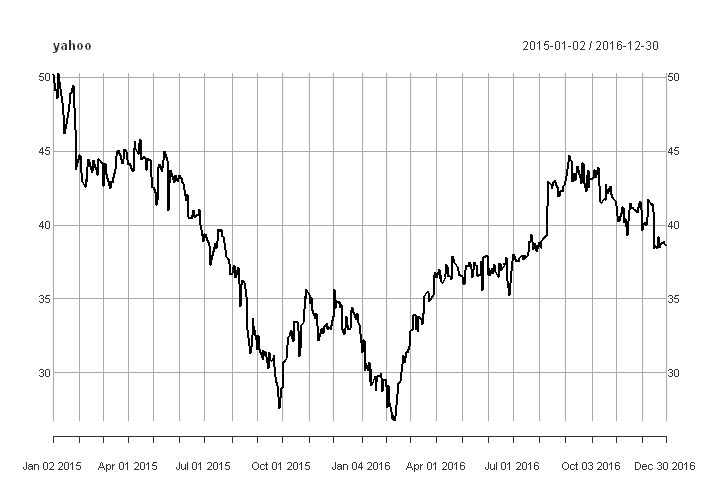

In [2]:
# Plot yahoo data and add title
plot(data$yahoo, main='yahoo')

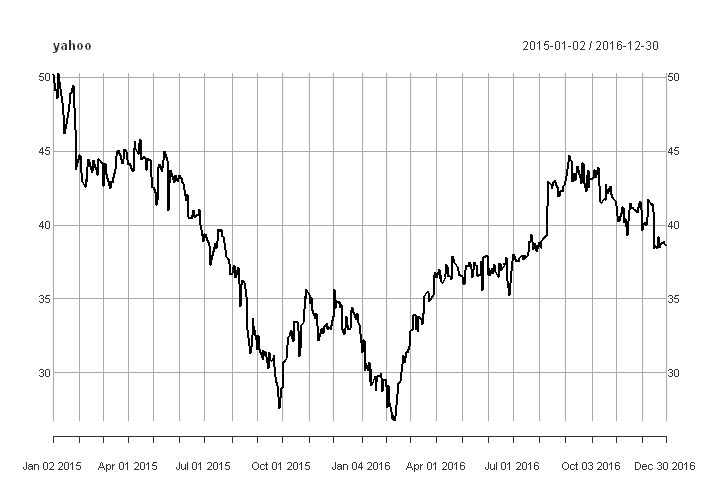

In [3]:
# Replot yahoo data with labels for X and Y axes
plot(data$yahoo, main='yahoo', xlab='date', ylab='price')

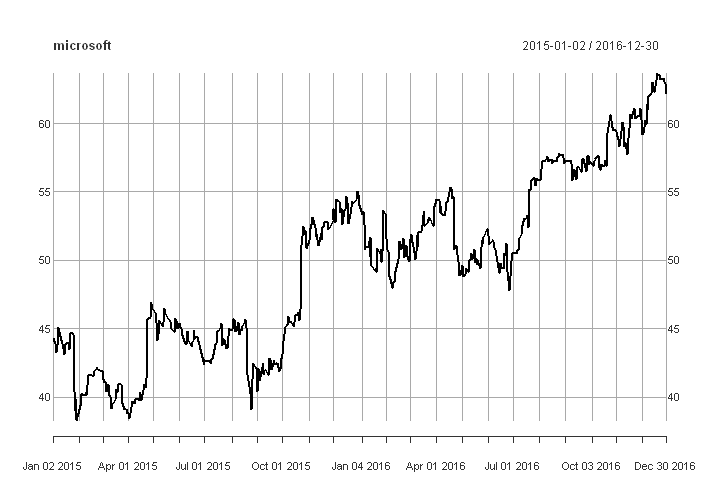

In [4]:
# Plot the second time series and change title
plot(data[,2], main='microsoft')


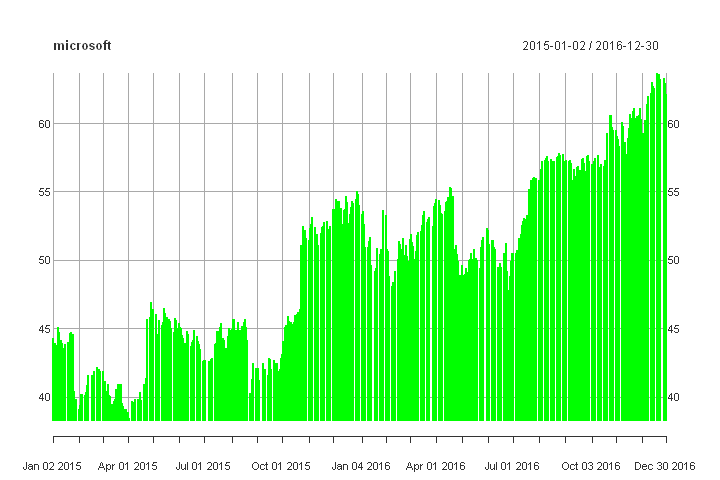

In [5]:
# Replot with same title, add subtitle, use bars
plot(data[,2], main='microsoft', sub="Daily closing price since 2015", type='h')


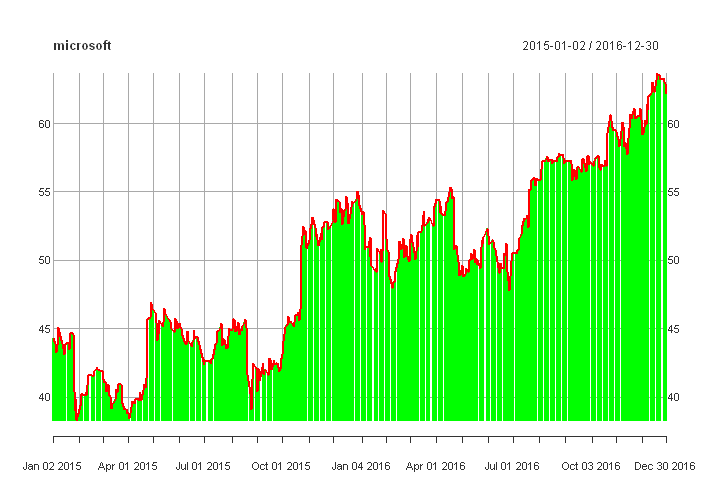

In [6]:
# Change line color to red
lines(data[,2], col = "red", lwd=2)

__Control graphic parameters__  

In R, it is also possible to tailor the window layout using the par() function.

To set up a graphical window for multiple charts with nr rows and nc columns, assign the vector c(nr, nc) to the option mfrow. To adjust the size of the margins and characters in the text, set the appropriate decimal value to to the options mex and cex, respectively. Like plot(), each call to par() only implements the parameters in that particular call.

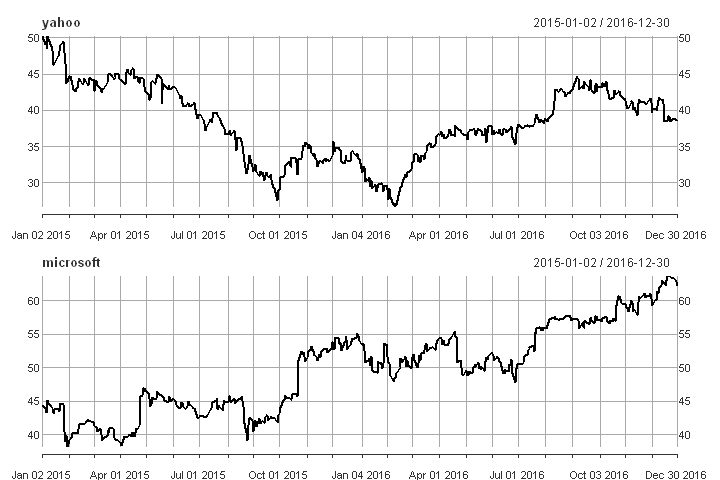

In [7]:
# Create a 2x1 graphical window
# Reduce margin size to 60% and character size to 80% of their normal sizes
# Plot the first two series in data in that order, including the title for each of them
par(mfrow = c(2,1), mex = 0.6, cex = 0.8)
plot(data[,1], main=colnames(data)[1])
plot(data[,2], main=colnames(data)[2])

__Adding an extra series to an existing chart__ 

A great way to visually compare two times series is to display them on the same chart with different scales.

Suppose you already have a plot of mydata.  
You can use lines(mydata2) to add a new time series mydata2 to this existing plot.  
If you want a scale for this time series on the right side of the plot with equally spaced tick marks, use axis(side, at), where side is an integer specifying which side of the plot the axis should be drawn on, and at is set equal to pretty(mydata2).

Finally, to distinguish these two time series, you can add a legend with the legend() function. 


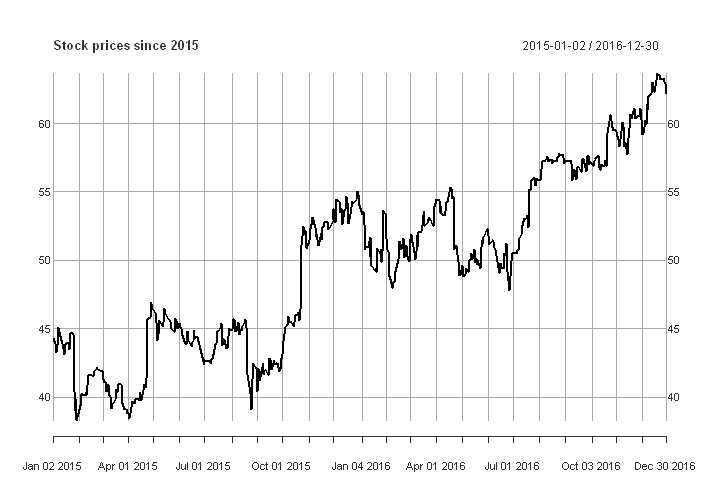

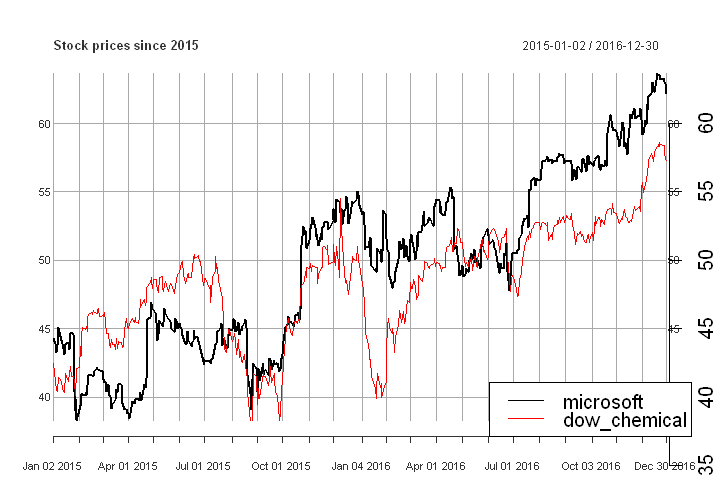

In [4]:
# Plot the "microsoft" series
plot(data$microsoft, main="Stock prices since 2015")

# Add the "dow_chemical" series in red
lines(data$dow_chemical, col="red")

# Add a Y axis on the right side of the chart
axis(side=4, at=pretty(data$dow_chemical))

# Add a legend in the bottom right corner
# legend specifies text label(s)
# col specifies color(s)
# lty specifies line type(s)
 
legend(x = "bottomright", legend = c("microsoft", "dow_chemical"), col = c("black", "red"), lty = c(1, 1))


__Highlighting events in a time series__  

It is possible to use the function abline() to add straight lines through an existing plot. Specifically, you can draw a vertical line to identify a particular date by setting h to a specific Y value, and a horizontal line to identify a particular level by setting v to a specific X value:

Recall that the index of an xts object are date objects, so the X values of a plot will also contain dates.   
In this exercise, you will use indexing as well as as.Date("YYYY-MM-DD") and mean() to visually compare the average of the Citigroup stock market prices to its price on January 4, 2016, after it was affected by turbulence in the Chinese stock market.

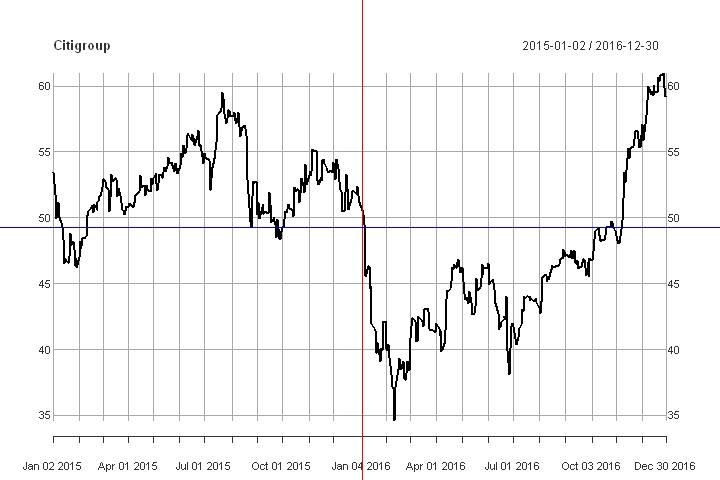

In [3]:
# Plot the "citigroup" time series
plot(data$citigroup, main = "Citigroup")

# Create vert_line to identify January 4th, 2016 in citigroup
vert_line <- which(index(data$citigroup) == as.Date('2016-01-04'))

# Add a red vertical line using vert_line
abline(v = .index(data$citigroup)[vert_line], col = "red")

# Create hori_line to identify average price of citigroup
hori_line <- mean(data$citigroup)

# Add a blue horizontal line using hori_line
abline(h = hori_line, col = "blue")

Warning message:
"package 'PerformanceAnalytics' is in use and will not be installed"